# HealthBit Data Analyst Case

**Author**: Victor de Paula Silva

**Email**: victor.depaula@live.com / victordepaula24@gmail.com

## Introduction

1. Two databases are presented: one for beneficiary registration - cadastro_base (listing all beneficiaries in the health plan, with respective characteristics) and one for claims/utilizations of the plan - sinistros_base (each row is an event performed, with data such as procedure type, date of realization, etc.).
2. The two databases are linked by the beneficiary.
3. The beneficiaries are from a company in the industrial sector.
4. The databases are updated monthly. Both the beneficiary registration database and the utilization database mirror what happened in each reference month/year.

## Preparing Environment

### Auxiliary Libraries
To work with data, Python provides us with some very useful tools:

- Pandas: A library that works with reading, processing, and manipulating data, usually in a tabular or sequential form (lists or tables).
- Numpy: A library for scientific computing, it helps us manipulate vectors, matrices, and perform mathematical operations on data.
- Matplotlib: Matplotlib is a library that helps us create graphical visualizations of data.
- Seaborn: Seaborn is an additional layer for Matplotlib, allowing us to create more complex and beautiful graphics.
- Warnings: It is just a library for removing execution warnings (to avoid cluttering our study).
- Sys: The sys module provides access to some variables used or maintained by the Python interpreter, and functions that interact with the interpreter, such as accessing command line arguments.
- OS: The os module provides a portable way of using operating system dependent functionality, such as reading or writing to the file system, manipulating paths, and interacting with the system environment variables.

In [1]:
# Installing libraries
!pip install openpyxl

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
import os

In [3]:
# Python version
print(sys.version)

3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]


### Settings

In [4]:
# Ignoring warnings
warnings.filterwarnings("ignore")

In [5]:
# Setting Matplotlib figure patterns
plt.rcParams['figure.figsize'] = (14, 6) # Size of the figures in inches
plt.rcParams['axes.titlepad'] = 26 # Title padding

In [6]:
# Setting Seaborn collor pallete
sns.set_palette("Accent") # Color palette
sns.set_style("whitegrid") # Graph style
sns.set(font_scale=1.5) # Setting the font size

In [7]:
# Setting numerical values on Pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Formatting to 1000000.00 for example

## Data Preparation & Cleaning

In [8]:
# Setting file path
file_path = r'C:\Users\Victor Paula\Documents\Personal\healthbit_data_analyst_case\Database'

# Listing files on path
files = os.listdir(file_path)
files

['beneficiaries.xlsx', 'cadastro_base.xlsx', 'sinistros_base.xlsx']

In [9]:
# Dictionary to store dataframes
dataframes = {}

# Iterate over each file
for file in files:
    # Extracting dataframe name for file name
    dataframe_name = file.split('.')[0]
    # Reading Excel file and creating dataframe
    dataframe = pd.read_excel(os.path.join(file_path, file))
    # Storing dataframe in dictionary
    dataframes[dataframe_name] = dataframe

In [10]:
# Importing files and creating dataframes
cadastro_base = dataframes['cadastro_base']
sinistros_base = dataframes['sinistros_base']

In [11]:
# Visualizing cadastro_base dataframe
cadastro_base.head()

,MÊS DE REFERÊNCIA,ANO DE REFERÊNCIA,CODIGO DA FAMILIA,CODIGO ÚNICO DA PESSOA,PLANO,TITULARIDADE,SEXO,IDADE,DATA DE NASCIMENTO,FAIXA ETÁRIA
0,5,2020,314,844,Básico,TITULAR,M,20,16/02/2000,19-23
1,5,2020,46,71,Básico,TITULAR,M,44,21/04/1976,44-48
2,5,2020,123,196,Básico,TITULAR,M,55,20/09/1964,54-58
3,5,2020,114,187,Básico,TITULAR,M,36,21/07/1983,34-38
4,5,2020,52,87,Básico,TITULAR,M,47,15/07/1972,44-48


In [12]:
# Dataframe cadastro_base format
cadastro_base.shape

(16736, 10)

In [13]:
# Dataframe cadastro_base columns
cadastro_base.columns

Index(['MÊS DE REFERÊNCIA', 'ANO DE REFERÊNCIA', 'CODIGO DA FAMILIA',
       'CODIGO ÚNICO DA PESSOA', 'PLANO', 'TITULARIDADE', 'SEXO', 'IDADE',
       'DATA DE NASCIMENTO', 'FAIXA ETÁRIA'],
      dtype='object')

In [14]:
# Informations of cadastro_base dataframe
cadastro_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16736 entries, 0 to 16735
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   MÊS DE REFERÊNCIA       16736 non-null  int64 
 1   ANO DE REFERÊNCIA       16736 non-null  int64 
 2   CODIGO DA FAMILIA       16736 non-null  int64 
 3   CODIGO ÚNICO DA PESSOA  16736 non-null  int64 
 4   PLANO                   16736 non-null  object
 5   TITULARIDADE            16736 non-null  object
 6   SEXO                    16736 non-null  object
 7   IDADE                   16736 non-null  int64 
 8   DATA DE NASCIMENTO      16736 non-null  object
 9   FAIXA ETÁRIA            16736 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.3+ MB


In [15]:
# Visualizing sinistros_base dataframe
sinistros_base.head()

,DATA DE REFERENCIA,CODIGO DO EVENTO,FONTE,PLANO,TITULARIDADE,CODIGO DA FAMILIA,CODIGO ÚNICO DA PESSOA,DATA DO EVENTO,PRESTADOR,VALOR DO EVENTO,DESCRITOR DO EVENTO,INTERNACAO?
0,01-05-2020,10101012,REDE,Básico,DEPENDENTE,184,418,13/03/2020,256,64.02,CONSULTA MEDICA EM CONSULTORIO,Não
1,01-05-2020,10101012,REDE,Básico,DEPENDENTE,198,421,17/03/2020,256,65.20,CONSULTA MEDICA EM CONSULTORIO,Não
2,01-05-2020,10101012,REDE,Básico,TITULAR,199,502,13/03/2020,256,65.20,CONSULTA MEDICA EM CONSULTORIO,Não
3,01-05-2020,10101012,REDE,Básico,TITULAR,199,502,18/03/2020,256,65.20,CONSULTA MEDICA EM CONSULTORIO,Não
4,01-05-2020,10101012,REDE,Básico,TITULAR,199,502,08/04/2020,1332,103.00,CONSULTA MEDICA EM CONSULTORIO,Não


In [16]:
# Dataframe sinistros_base format
sinistros_base.shape

(48965, 12)

In [17]:
# Dataframe sinistros_base columns
sinistros_base.columns

Index(['DATA DE REFERENCIA', 'CODIGO DO EVENTO', 'FONTE', 'PLANO',
       'TITULARIDADE', 'CODIGO DA FAMILIA', 'CODIGO ÚNICO DA PESSOA',
       'DATA DO EVENTO', 'PRESTADOR', 'VALOR DO EVENTO', 'DESCRITOR DO EVENTO',
       'INTERNACAO?'],
      dtype='object')

In [18]:
# Informations of sinistros_base dataframe
sinistros_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48965 entries, 0 to 48964
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATA DE REFERENCIA      48965 non-null  object 
 1   CODIGO DO EVENTO        48965 non-null  int64  
 2   FONTE                   48965 non-null  object 
 3   PLANO                   48965 non-null  object 
 4   TITULARIDADE            48965 non-null  object 
 5   CODIGO DA FAMILIA       48965 non-null  int64  
 6   CODIGO ÚNICO DA PESSOA  48965 non-null  int64  
 7   DATA DO EVENTO          48965 non-null  object 
 8   PRESTADOR               48965 non-null  int64  
 9   VALOR DO EVENTO         48965 non-null  float64
 10  DESCRITOR DO EVENTO     48965 non-null  object 
 11  INTERNACAO?             48965 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 4.5+ MB


In [19]:
# Filtering results with invalid dates
cadastro_base_invalid_dates = cadastro_base[cadastro_base['DATA DE NASCIMENTO'] == '00/00/0000']
cadastro_base_invalid_dates

,MÊS DE REFERÊNCIA,ANO DE REFERÊNCIA,CODIGO DA FAMILIA,CODIGO ÚNICO DA PESSOA,PLANO,TITULARIDADE,SEXO,IDADE,DATA DE NASCIMENTO,FAIXA ETÁRIA
960,5,2020,737,1800,Básico,DEPENDENTE,M,17,00/00/0000,0-18
962,5,2020,738,1802,Básico,TITULAR,M,26,00/00/0000,24-28
963,5,2020,639,1580,Básico,TITULAR,M,49,00/00/0000,49-53
965,5,2020,714,1752,Básico,TITULAR,F,20,00/00/0000,19-23
1249,5,2020,739,1803,Médio,TITULAR,M,49,00/00/0000,49-53
2681,6,2020,744,1813,Superior,DEPENDENTE,F,46,00/00/0000,44-48
5032,8,2020,737,1842,Básico,DEPENDENTE,F,45,00/00/0000,44-48
5038,8,2020,752,1843,Básico,TITULAR,M,33,00/00/0000,29-33
5042,8,2020,641,1585,Básico,TITULAR,M,34,00/00/0000,34-38
5043,8,2020,641,1844,Básico,DEPENDENTE,F,36,00/00/0000,34-38


In [20]:
# Extracting unique values from the 'CODIGO ÚNICO DA PESSOA' column
unique_beneficiary_code = cadastro_base_invalid_dates['CODIGO ÚNICO DA PESSOA'].unique()

# Filtering cadastro_base based on unique_beneficiary_code
cadastro_base[cadastro_base['CODIGO ÚNICO DA PESSOA'].isin(unique_beneficiary_code)].sort_values(by='CODIGO ÚNICO DA PESSOA')

,MÊS DE REFERÊNCIA,ANO DE REFERÊNCIA,CODIGO DA FAMILIA,CODIGO ÚNICO DA PESSOA,PLANO,TITULARIDADE,SEXO,IDADE,DATA DE NASCIMENTO,FAIXA ETÁRIA
963,5,2020,639,1580,Básico,TITULAR,M,49,00/00/0000,49-53
5042,8,2020,641,1585,Básico,TITULAR,M,34,00/00/0000,34-38
965,5,2020,714,1752,Básico,TITULAR,F,20,00/00/0000,19-23
960,5,2020,737,1800,Básico,DEPENDENTE,M,17,00/00/0000,0-18
962,5,2020,738,1802,Básico,TITULAR,M,26,00/00/0000,24-28
1249,5,2020,739,1803,Médio,TITULAR,M,49,00/00/0000,49-53
2681,6,2020,744,1813,Superior,DEPENDENTE,F,46,00/00/0000,44-48
5032,8,2020,737,1842,Básico,DEPENDENTE,F,45,00/00/0000,44-48
5038,8,2020,752,1843,Básico,TITULAR,M,33,00/00/0000,29-33
5043,8,2020,641,1844,Básico,DEPENDENTE,F,36,00/00/0000,34-38


In [21]:
# Transforming date columns in cadastro_base dataframe
date_column = 'DATA DE NASCIMENTO'

# Function to convert invalid dates to the first valid date
def convert_invalid_date(date_string):
    if date_string == "00/00/0000":
        return "01/01/1900"
    else:
        return date_string

# Applying pd.to_datetime with lambda function to handle invalid dates
cadastro_base[date_column] = cadastro_base[date_column].apply(lambda x: convert_invalid_date(x))

# Converting the date column to datetime format
cadastro_base[date_column] = pd.to_datetime(cadastro_base[date_column], format='%d/%m/%Y')

In [22]:
# Visualizing cadastro_base after transformation
cadastro_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16736 entries, 0 to 16735
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   MÊS DE REFERÊNCIA       16736 non-null  int64         
 1   ANO DE REFERÊNCIA       16736 non-null  int64         
 2   CODIGO DA FAMILIA       16736 non-null  int64         
 3   CODIGO ÚNICO DA PESSOA  16736 non-null  int64         
 4   PLANO                   16736 non-null  object        
 5   TITULARIDADE            16736 non-null  object        
 6   SEXO                    16736 non-null  object        
 7   IDADE                   16736 non-null  int64         
 8   DATA DE NASCIMENTO      16736 non-null  datetime64[ns]
 9   FAIXA ETÁRIA            16736 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 1.3+ MB


In [23]:
# Transforming date columns in sinistros_base dataframe
date_columns = ['DATA DE REFERENCIA', 'DATA DO EVENTO']
sinistros_base[date_columns] = sinistros_base[date_columns].apply(pd.to_datetime, format='mixed')

In [24]:
# Visualizing sinistros_base after transformation
sinistros_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48965 entries, 0 to 48964
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATA DE REFERENCIA      48965 non-null  datetime64[ns]
 1   CODIGO DO EVENTO        48965 non-null  int64         
 2   FONTE                   48965 non-null  object        
 3   PLANO                   48965 non-null  object        
 4   TITULARIDADE            48965 non-null  object        
 5   CODIGO DA FAMILIA       48965 non-null  int64         
 6   CODIGO ÚNICO DA PESSOA  48965 non-null  int64         
 7   DATA DO EVENTO          48965 non-null  datetime64[ns]
 8   PRESTADOR               48965 non-null  int64         
 9   VALOR DO EVENTO         48965 non-null  float64       
 10  DESCRITOR DO EVENTO     48965 non-null  object        
 11  INTERNACAO?             48965 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), ob

### Preliminary information

- Both dataframes have all information complete, without missing values;
- Only the date columns need to be transformed, as they are not in datetime format, but the others are in the correct data type, either int, float, or object/string;
- `cadastro_base` has 12 records with invalid dates (00/00/0000) that needed to be treated, so the column could be converted to datetime. `sinistros_base` does not have the same problem.

## Exploratory Analysis & Visualization

### cadastro_base

In [25]:
# Number of unique beneficiaries
unique_beneficiaries = cadastro_base['CODIGO ÚNICO DA PESSOA'].nunique()
unique_beneficiaries

1679

In [26]:
# Visualizing clients with more than 1 age registered
multiple_ages = cadastro_base.groupby('CODIGO ÚNICO DA PESSOA')['IDADE'].nunique().loc[lambda x: x > 1].sort_values(ascending=False)
multiple_ages

CODIGO ÚNICO DA PESSOA
228     3
810     3
973     2
981     2
980     2
       ..
475     2
474     2
473     2
472     2
1650    2
Name: IDADE, Length: 1225, dtype: int64

In [27]:
# Describing cadastro_base dataframe
cadastro_base.describe()

,MÊS DE REFERÊNCIA,ANO DE REFERÊNCIA,CODIGO DA FAMILIA,CODIGO ÚNICO DA PESSOA,IDADE,DATA DE NASCIMENTO
count,16736.00,16736.00,16736.00,16736.00,16736.00,16736
mean,6.47,2020.34,273.84,756.09,27.96,1992-04-09 13:01:46.692160640
min,1.00,2020.00,1.00,1.00,0.00,1900-01-01 00:00:00
25%,3.00,2020.00,112.00,365.00,14.00,1980-06-30 00:00:00
50%,6.00,2020.00,243.00,727.00,30.00,1990-04-27 00:00:00
75%,10.00,2021.00,424.00,1140.00,40.00,2006-05-05 00:00:00
max,12.00,2021.00,754.00,1847.00,68.00,2021-04-26 00:00:00
std,3.47,0.47,184.53,455.02,15.94,NaN


Here, we can see that the `MÊS DE REFERÊNCIA` range from the first (January) to the last month (December), between the `ANO DE REFERÊNCIA` 2020 and 2021. We also have the `CODIGO DA FAMILIA` ranging from 1 to 754, and the `CODIGO ÚNICO DA PESSOA` ranging from 1 to 1847. 

In terms of `IDADE`, the minimum age ranges from 0 to 68 years. An age of 0 indicates that the beneficiary is a baby who has not yet turned 1 year old. The average age is ~28 years, with a standard deviation (variation) of ~16 years around the mean.

Thus, based on this dataset where `CODIGO ÚNICO DA PESSOA` can be duplicated based on the month and year of reference, we can see that 50% of the beneficiaries are up to 30 years old.

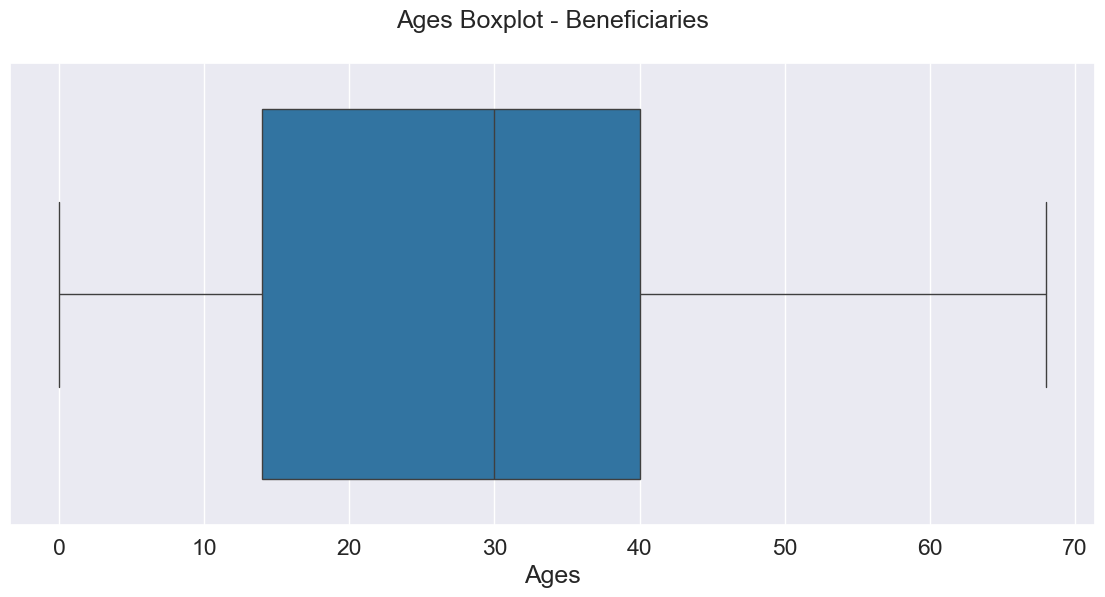

In [28]:
# Creating and visualizing ages boxplot
sns.boxplot(cadastro_base.IDADE, color='tab:blue', orient='h')
plt.xlabel('Ages')
plt.title('Ages Boxplot - Beneficiaries');

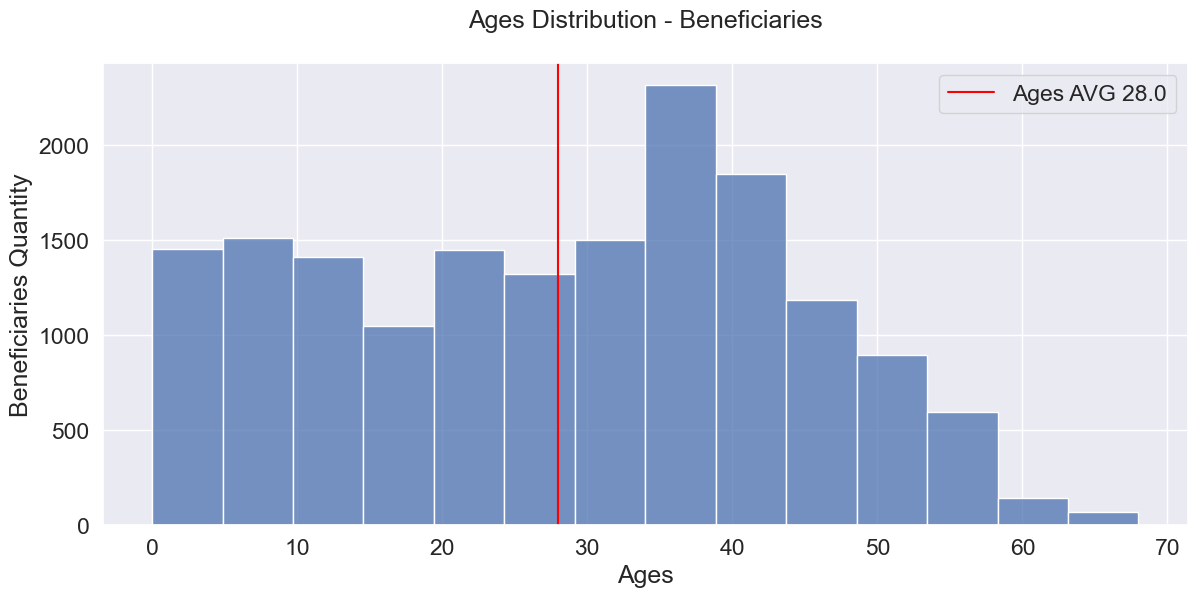

In [29]:
# Creating and visualizing ages histogram
ages_avg = cadastro_base.IDADE.mean()
sns.histplot(cadastro_base.IDADE, bins=14)

plt.axvline(ages_avg, c='red', label='Ages AVG {}'.format(round(ages_avg, 0)))
plt.ylabel('Beneficiaries Quantity')
plt.xlabel('Ages')
plt.title('Ages Distribution - Beneficiaries')
plt.legend();

In [30]:
cadastro_base

,MÊS DE REFERÊNCIA,ANO DE REFERÊNCIA,CODIGO DA FAMILIA,CODIGO ÚNICO DA PESSOA,PLANO,TITULARIDADE,SEXO,IDADE,DATA DE NASCIMENTO,FAIXA ETÁRIA
0,5,2020,314,844,Básico,TITULAR,M,20,2000-02-16,19-23
1,5,2020,46,71,Básico,TITULAR,M,44,1976-04-21,44-48
2,5,2020,123,196,Básico,TITULAR,M,55,1964-09-20,54-58
3,5,2020,114,187,Básico,TITULAR,M,36,1983-07-21,34-38
4,5,2020,52,87,Básico,TITULAR,M,47,1972-07-15,44-48
...,...,...,...,...,...,...,...,...,...,...
16731,4,2021,637,1576,Superior,DEPENDENTE,M,46,1975-02-09,44-48
16732,4,2021,637,1577,Superior,DEPENDENTE,F,3,2017-04-15,0-18
16733,4,2021,637,1575,Superior,TITULAR,F,41,1979-10-13,39-43
16734,4,2021,696,1697,Superior,TITULAR,M,34,1986-10-01,34-38


In [31]:
cadastro_base.columns

Index(['MÊS DE REFERÊNCIA', 'ANO DE REFERÊNCIA', 'CODIGO DA FAMILIA',
       'CODIGO ÚNICO DA PESSOA', 'PLANO', 'TITULARIDADE', 'SEXO', 'IDADE',
       'DATA DE NASCIMENTO', 'FAIXA ETÁRIA'],
      dtype='object')

In [32]:
# Visualizing the total number of unique beneficiaries by gender
cadastro_base.groupby('SEXO')['CODIGO ÚNICO DA PESSOA'].nunique()

SEXO
F    787
M    892
Name: CODIGO ÚNICO DA PESSOA, dtype: int64

In [33]:
# Visualizing the percentual of total by gender
percentage_by_gender = (cadastro_base.groupby('SEXO')['CODIGO ÚNICO DA PESSOA'].nunique() / cadastro_base['CODIGO ÚNICO DA PESSOA'].nunique()) * 100
percentage_by_gender

SEXO
F   46.87
M   53.13
Name: CODIGO ÚNICO DA PESSOA, dtype: float64

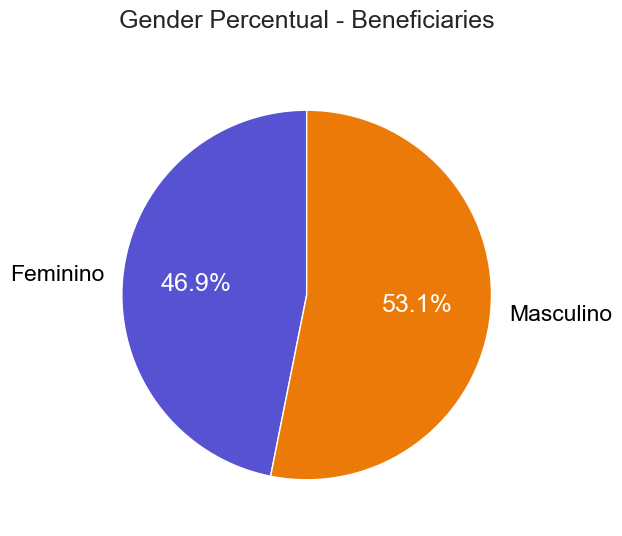

In [34]:
# Creating and visualizing gender distribution
_, ax = plt.subplots()

patches, texts, autotexts = ax.pie(
    percentage_by_gender, 
    colors = ['#5752D1', '#EC7A08'], 
    labels=['Feminino', 'Masculino'], 
    autopct='%1.1f%%', 
    startangle=90
)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('white')
    
plt.title('Gender Percentual - Beneficiaries');

We have more male individuals in the dataset, representing 53% of the total, while the female population represents 47% of the dataset, looking at the column CODIGO `ÚNICO DA PESSOA` distinctly.

In [35]:
# Visualizing clients with more than 1 plan
multiple_plans = cadastro_base.groupby('CODIGO ÚNICO DA PESSOA')['PLANO'].nunique().loc[lambda x: x > 1].sort_values(ascending=False)
multiple_plans

Series([], Name: PLANO, dtype: int64)

There are no beneficiaries with more than one plan over time. In other words, all beneficiaries have only one plan.

In [36]:
# Visualizing the total number of unique beneficiaries by plan
cadastro_base.groupby('PLANO')['CODIGO ÚNICO DA PESSOA'].nunique()

PLANO
Básico      1163
Médio        392
Superior     124
Name: CODIGO ÚNICO DA PESSOA, dtype: int64

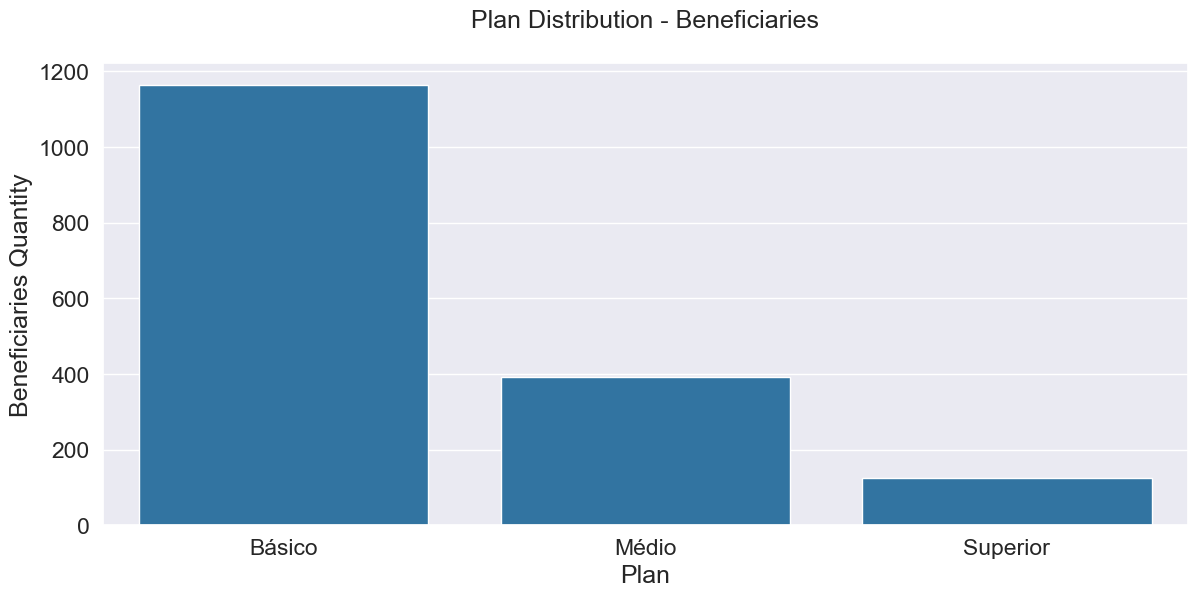

In [37]:
sns.barplot(x=cadastro_base.groupby('PLANO')['CODIGO ÚNICO DA PESSOA'].nunique().index, 
            y=cadastro_base.groupby('PLANO')['CODIGO ÚNICO DA PESSOA'].nunique().values, 
            color='tab:blue')
plt.xlabel('Plan')
plt.ylabel('Beneficiaries Quantity')
plt.title('Plan Distribution - Beneficiaries');

69% of unique beneficiaries have the 'Básico' `PLANO`, representing 69% of the total. On the other hand, only 7% of the plans are 'Superior', which is just over 9 times smaller than the total number of 'Básico' plans. This indicates a significant concentration of lower-value plans in this company.

In [38]:
# Visualizing the total number of unique beneficiaries by titularity
cadastro_base.groupby('TITULARIDADE')['CODIGO ÚNICO DA PESSOA'].nunique()

TITULARIDADE
DEPENDENTE    992
TITULAR       687
Name: CODIGO ÚNICO DA PESSOA, dtype: int64

In [39]:
# Visualizing the percentual of total by titularity
percentage_by_titularity = (cadastro_base.groupby('TITULARIDADE')['CODIGO ÚNICO DA PESSOA'].nunique() / cadastro_base['CODIGO ÚNICO DA PESSOA'].nunique()) * 100
percentage_by_titularity

TITULARIDADE
DEPENDENTE   59.08
TITULAR      40.92
Name: CODIGO ÚNICO DA PESSOA, dtype: float64

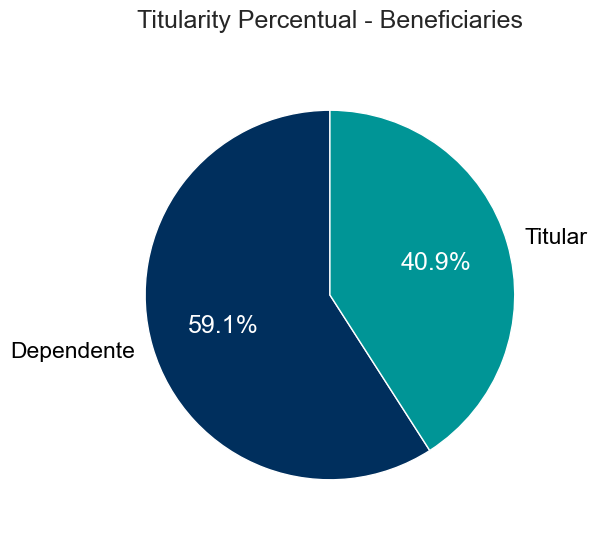

In [40]:
# Creating and visualizing titularity distribution
_, ax = plt.subplots()

patches, texts, autotexts = ax.pie(
    percentage_by_titularity, 
    colors = ['#002F5D', '#009596'], 
    labels=['Dependente', 'Titular'], 
    autopct='%1.1f%%', 
    startangle=90
)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('white')
    
plt.title('Titularity Percentual - Beneficiaries');

The majority of beneficiaries are dependents, representing 59% of the total when we look at the `TITULARIDADE` column. This indicates that, overall, a policyholder brings at least one dependent, but there are many cases where this number is even higher, as the policyholder can add their spouse and also a child, for example.

In [41]:
# Grouping by 'CODIGO ÚNICO DA PESSOA' and counting unique 'DATA DE NASCIMENTO'
duplicates = cadastro_base.groupby('CODIGO ÚNICO DA PESSOA')['DATA DE NASCIMENTO'].nunique()

# Filtering for duplicates
duplicates = duplicates[duplicates > 1]

# Displaying the results
print(duplicates)


CODIGO ÚNICO DA PESSOA
1388    2
Name: DATA DE NASCIMENTO, dtype: int64


In [42]:
# Visualizing clients with more than date of birth
multiple_bithdate = cadastro_base.groupby('CODIGO ÚNICO DA PESSOA')['DATA DE NASCIMENTO'].nunique().loc[lambda x: x > 1].sort_values(ascending=False)
multiple_bithdate

CODIGO ÚNICO DA PESSOA
1388    2
Name: DATA DE NASCIMENTO, dtype: int64

### sinistros_base

In [43]:
# Dimensions of database
sinistros_base.shape

(48965, 12)

In [45]:
# Looking to dataframe
sinistros_base.head()

,DATA DE REFERENCIA,CODIGO DO EVENTO,FONTE,PLANO,TITULARIDADE,CODIGO DA FAMILIA,CODIGO ÚNICO DA PESSOA,DATA DO EVENTO,PRESTADOR,VALOR DO EVENTO,DESCRITOR DO EVENTO,INTERNACAO?
0,2020-01-05,10101012,REDE,Básico,DEPENDENTE,184,418,2020-03-13,256,64.02,CONSULTA MEDICA EM CONSULTORIO,Não
1,2020-01-05,10101012,REDE,Básico,DEPENDENTE,198,421,2020-03-17,256,65.20,CONSULTA MEDICA EM CONSULTORIO,Não
2,2020-01-05,10101012,REDE,Básico,TITULAR,199,502,2020-03-13,256,65.20,CONSULTA MEDICA EM CONSULTORIO,Não
3,2020-01-05,10101012,REDE,Básico,TITULAR,199,502,2020-03-18,256,65.20,CONSULTA MEDICA EM CONSULTORIO,Não
4,2020-01-05,10101012,REDE,Básico,TITULAR,199,502,2020-08-04,1332,103.00,CONSULTA MEDICA EM CONSULTORIO,Não


In [46]:
sinistros_base.columns

Index(['DATA DE REFERENCIA', 'CODIGO DO EVENTO', 'FONTE', 'PLANO',
       'TITULARIDADE', 'CODIGO DA FAMILIA', 'CODIGO ÚNICO DA PESSOA',
       'DATA DO EVENTO', 'PRESTADOR', 'VALOR DO EVENTO', 'DESCRITOR DO EVENTO',
       'INTERNACAO?'],
      dtype='object')

In [47]:
# Setting unique key of dataframe
unique_key = ['CODIGO DO EVENTO','FONTE','PLANO','TITULARIDADE','CODIGO DA FAMILIA','CODIGO ÚNICO DA PESSOA',
              'DATA DO EVENTO','PRESTADOR','VALOR DO EVENTO','DESCRITOR DO EVENTO','INTERNACAO?']

# Checking duplicates 
duplicates = sinistros_base.groupby(unique_key).agg({'DATA DE REFERENCIA': 'nunique'}).reset_index()

# filtering duplicates
duplicates = duplicates[duplicates['DATA DE REFERENCIA'] > 1]
duplicates.head()

,CODIGO DO EVENTO,FONTE,PLANO,TITULARIDADE,CODIGO DA FAMILIA,CODIGO ÚNICO DA PESSOA,DATA DO EVENTO,PRESTADOR,VALOR DO EVENTO,DESCRITOR DO EVENTO,INTERNACAO?,DATA DE REFERENCIA
1450,10101012,REDE,Básico,DEPENDENTE,246,645,2021-01-22,425,90.80,CONSULTA MEDICA EM CONSULTORIO,Não,2
3456,10101012,REEMBOLSO,Médio,TITULAR,381,1001,2020-04-14,408,107.10,CONSULTA MEDICA EM CONSULTORIO,Não,2
3458,10101012,REEMBOLSO,Médio,TITULAR,381,1001,2020-05-14,408,107.10,CONSULTA MEDICA EM CONSULTORIO,Não,2
7067,30101280,REDE,Médio,TITULAR,358,1081,2020-12-03,403,162.80,DESBRIDAMENTO CIRURG- POR UNIDADE TOPOGRAFICA ...,Sim,2
7119,30101611,REDE,Médio,TITULAR,358,1081,2020-12-03,403,264.78,INCISAO E DRENAGEM DE TENOSSINOVITES PURULENTAS,Sim,2


As we observed in the ``cadastro_base`` dataset, ``sinistros_base`` also contains duplicated records with different reference dates. In this case, a unique key for an event is understood as the combination of the 'CODIGO DO EVENTO','FONTE','PLANO','TITULARIDADE','CODIGO DA FAMILIA','CODIGO ÚNICO DA PESSOA','DATA DO EVENTO','PRESTADOR','VALOR DO EVENTO','DESCRITOR DO EVENTO', and 'INTERNACAO?' columns.

Therefore, out of the original 48965 records, there are **4170 duplicates**. Thus, similar to the previous dataset, it is worthwhile to handle the records to ensure a unique outcome for each event, avoiding incorrect conclusions about the numbers.

In [48]:
# Getting the index of the last record for each unique key
last_index = sinistros_base.groupby(unique_key)['DATA DE REFERENCIA'].idxmax()

# Selecting the records corresponding to the indices
claims = sinistros_base.loc[last_index].reset_index(drop=True)

In [49]:
claims.shape

(44795, 12)

In [64]:
claims.columns

Index(['DATA DE REFERENCIA', 'CODIGO DO EVENTO', 'FONTE', 'PLANO',
       'TITULARIDADE', 'CODIGO DA FAMILIA', 'CODIGO ÚNICO DA PESSOA',
       'DATA DO EVENTO', 'PRESTADOR', 'VALOR DO EVENTO', 'DESCRITOR DO EVENTO',
       'INTERNACAO?'],
      dtype='object')

In [52]:
claims

,DATA DE REFERENCIA,CODIGO DO EVENTO,FONTE,PLANO,TITULARIDADE,CODIGO DA FAMILIA,CODIGO ÚNICO DA PESSOA,DATA DO EVENTO,PRESTADOR,VALOR DO EVENTO,DESCRITOR DO EVENTO,INTERNACAO?
0,2020-01-08,10022,REDE,Médio,DEPENDENTE,409,1131,2019-10-07,762,8.82,CONSULTA MEDICA HOSP (INTERCONSULTA ENTRE ESPE...,Sim
1,2020-01-08,10022,REDE,Médio,DEPENDENTE,409,1131,2019-11-07,762,8.82,CONSULTA MEDICA HOSP (INTERCONSULTA ENTRE ESPE...,Sim
2,2020-01-08,10022,REDE,Médio,DEPENDENTE,409,1131,2019-12-07,762,8.82,CONSULTA MEDICA HOSP (INTERCONSULTA ENTRE ESPE...,Sim
3,2021-01-04,10189,REDE,Básico,TITULAR,10,272,2020-12-29,1208,96.26,VISITA DE ENFERMAGEM DOMICILIAR,Sim
4,2020-01-10,100102,REDE,Básico,DEPENDENTE,18,660,2020-08-19,784,95.02,ATENDIMENTO/CONSULTA DE EMERGENCIA PEDIATRICO,Não
...,...,...,...,...,...,...,...,...,...,...,...,...
44790,2021-01-03,96008369,REDE,Básico,DEPENDENTE,294,794,2019-01-15,1023,221.56,SIH 303140070 TRAT DOENCA DO OUVIDO EXT MED MA...,Não
44791,2020-01-11,96012145,REDE,Básico,TITULAR,82,126,2018-10-21,1023,1309.50,SIH SUS 603050018 ABCIXIMABE,Sim
44792,2021-01-03,96015012,REDE,Básico,DEPENDENTE,38,203,2019-03-25,1023,1368.00,SIH SUS 303170140 TTO CL CONT COMP DES E OU DI...,Não
44793,2021-01-03,96016914,REDE,Básico,TITULAR,658,1624,2019-03-25,1023,23.62,SIH SUS 301110018 ACOMP PACI MEDIO GRANDE QUEI...,Não


In [50]:
# Visualizing the total number of events by month
events_per_month = sinistros_base.groupby(sinistros_base['DATA DO EVENTO'].dt.to_period('M'))['CODIGO DO EVENTO'].count().sort_index()
events_per_month

DATA DO EVENTO
2017-02       2
2017-04       2
2017-06       2
2017-07       1
2017-08       1
2017-09       2
2017-10      44
2017-11      17
2017-12     101
2018-01      22
2018-02      85
2018-03      28
2018-04      26
2018-05      27
2018-06      20
2018-07      24
2018-08      19
2018-09      49
2018-10      73
2018-11      45
2018-12      34
2019-01      59
2019-02      65
2019-03      31
2019-04      28
2019-05      98
2019-06      25
2019-07      23
2019-08      25
2019-09      22
2019-10      25
2019-11      29
2019-12      41
2020-01    1317
2020-02    1853
2020-03    3385
2020-04    3000
2020-05    3398
2020-06    3271
2020-07    4474
2020-08    4543
2020-09    3818
2020-10    3879
2020-11    3793
2020-12    2612
2021-01    3249
2021-02    1674
2021-03     497
2021-04     486
2021-05     523
2021-06     287
2021-07     179
2021-08     294
2021-09     350
2021-10     304
2021-11     407
2021-12     277
Freq: M, Name: CODIGO DO EVENTO, dtype: int64

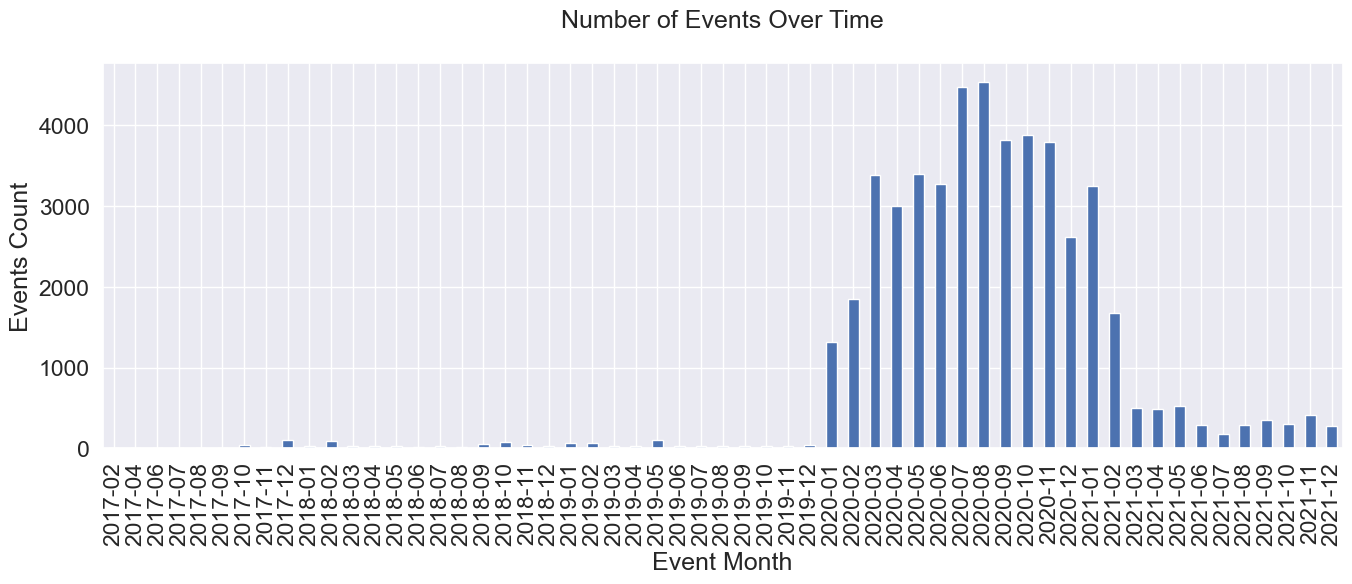

In [55]:
plt.figure(figsize=(16, 5))
events_per_month.plot(kind='bar')
plt.xlabel('Event Month')
plt.ylabel('Events Count')
plt.title('Number of Events Over Time');

In [57]:
# Visualizing the total value of events by month
event_value_per_month = sinistros_base.groupby(sinistros_base['DATA DO EVENTO'].dt.to_period('M'))['VALOR DO EVENTO'].sum().sort_index()
event_value_per_month

DATA DO EVENTO
2017-02        96.20
2017-04      1719.72
2017-06        52.88
2017-07         3.16
2017-08         3.20
2017-09        53.23
2017-10      1329.63
2017-11       524.18
2017-12       223.08
2018-01     12821.83
2018-02      4687.00
2018-03       309.55
2018-04      5094.79
2018-05      1893.18
2018-06      5643.54
2018-07      1983.42
2018-08      2083.95
2018-09      5341.64
2018-10     35067.79
2018-11     13309.19
2018-12      5567.50
2019-01     29326.71
2019-02      1256.70
2019-03      7931.97
2019-04      1543.19
2019-05     14649.28
2019-06      3805.28
2019-07      4711.03
2019-08      2158.63
2019-09      6745.37
2019-10      2093.47
2019-11      5488.22
2019-12      1618.35
2020-01    457303.21
2020-02    405436.68
2020-03    572522.36
2020-04    794704.40
2020-05   2509412.16
2020-06    960841.91
2020-07    861928.59
2020-08    994153.82
2020-09    593829.52
2020-10    927387.42
2020-11   1136646.31
2020-12    538427.91
2021-01    453410.77
2021-02    243986.7

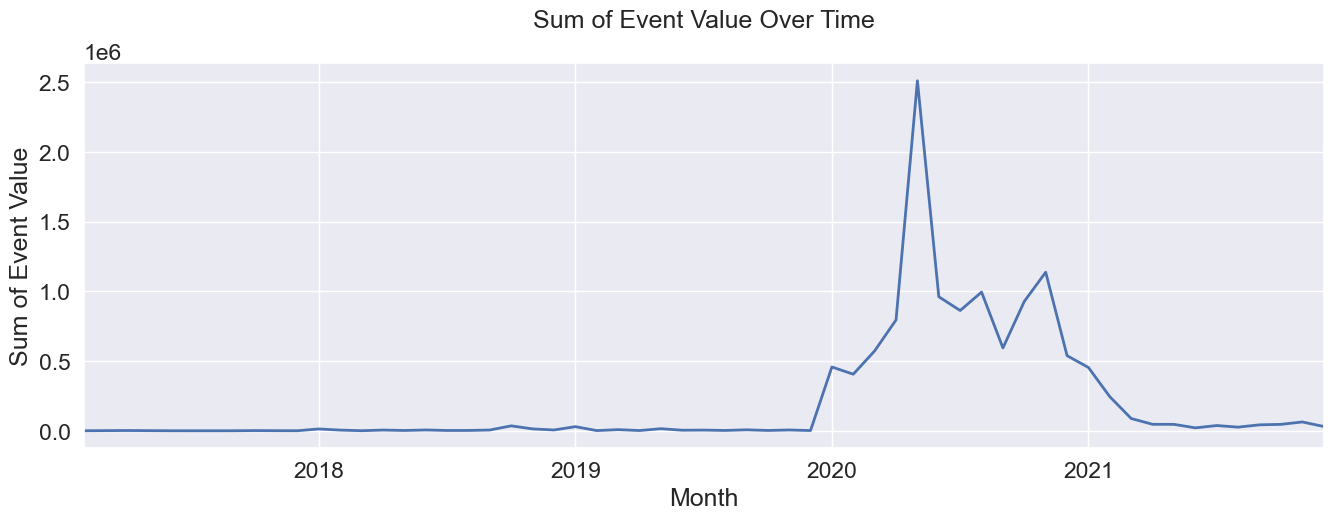

In [63]:
plt.figure(figsize=(16, 5))
event_value_per_month.plot(kind='line', linestyle='-', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Sum of Event Value')
plt.title('Sum of Event Value Over Time');

The two graphs show that starting from January 2020, there is an increase in the total number and value of events. The number of events peaks between July and August 2020, while the value of the events peaks in April to May 2020. 

However, from 2021 onwards, there is a sharp decline in these trends, with a reduction in both the total number of events and their values.

In [92]:
# Defining function to calculate events over the year
def top_events(dataframe, year=None):
    if year:
        events = dataframe[dataframe['DATA DO EVENTO'].dt.year == year].groupby(['CODIGO DO EVENTO', 'DESCRITOR DO EVENTO'])['CODIGO DO EVENTO'].count().nlargest(10)
    else:
        events = dataframe.groupby(['CODIGO DO EVENTO', 'DESCRITOR DO EVENTO'])['CODIGO DO EVENTO'].count().nlargest(10)
    return events

In [96]:
top_events_all = top_events(claims)
top_events_2020 = top_events(claims, year=2020)
top_events_2021 = top_events(claims, year=2021)

In [97]:
print("Top 5 events in the entire dataset:")
print(top_events_all)

Top 5 events in the entire dataset:
CODIGO DO EVENTO  DESCRITOR DO EVENTO                               
10101012          CONSULTA MEDICA EM CONSULTORIO                        3501
64620107          ATENDIMENTO EM PRONTO SOCORRO(PCTE COM HM)            1496
61430056          MATERIAIS                                             1174
40304361          HEMOGRAMA COMPLETO-ERITROGRAMA LEUCOGRAMA PLAQUETA    1072
40302040          GLICOSE                                                835
Name: CODIGO DO EVENTO, dtype: int64


In [98]:
print("\nTop 10 events in 2020:")
print(top_events_2020)


Top 10 events in 2020:
CODIGO DO EVENTO  DESCRITOR DO EVENTO                               
10101012          CONSULTA MEDICA EM CONSULTORIO                        2658
64620107          ATENDIMENTO EM PRONTO SOCORRO(PCTE COM HM)            1116
40304361          HEMOGRAMA COMPLETO-ERITROGRAMA LEUCOGRAMA PLAQUETA     892
61430056          MATERIAIS                                              727
40301630          CREATININA                                             690
40302040          GLICOSE                                                688
40302580          UREIA                                                  625
50000470          SESSAO DE PSICOTERAPIA INDIVIDUAL POR PSICOLOGO        590
10102019          VISITA HOSPITALAR (PACIENTE INTERNADO)                 568
61430013          MEDICAMENTOS                                           487
Name: CODIGO DO EVENTO, dtype: int64


In [99]:
print("\nTop 10 events in 2021:")
print(top_events_2021)


Top 10 events in 2021:
CODIGO DO EVENTO  DESCRITOR DO EVENTO                               
10101012          CONSULTA MEDICA EM CONSULTORIO                        824
64620107          ATENDIMENTO EM PRONTO SOCORRO(PCTE COM HM)            377
40304361          HEMOGRAMA COMPLETO-ERITROGRAMA LEUCOGRAMA PLAQUETA    166
50000470          SESSAO DE PSICOTERAPIA INDIVIDUAL POR PSICOLOGO       158
61430056          MATERIAIS                                             154
40302040          GLICOSE                                               140
61430013          MEDICAMENTOS                                          123
40316521          TIREOESTIMULANTE HORMONIO (TSH)                       122
40301630          CREATININA                                            120
40316491          T4 LIVRE                                              113
Name: CODIGO DO EVENTO, dtype: int64


In [71]:
# Visualizing what family 
top_families = claims['CODIGO DA FAMILIA'].value_counts().nlargest(3)
top_families

CODIGO DA FAMILIA
108    5005
133    3086
429     829
Name: count, dtype: int64

In [72]:
claims[claims['CODIGO DA FAMILIA'] == 108]

,DATA DE REFERENCIA,CODIGO DO EVENTO,FONTE,PLANO,TITULARIDADE,CODIGO DA FAMILIA,CODIGO ÚNICO DA PESSOA,DATA DO EVENTO,PRESTADOR,VALOR DO EVENTO,DESCRITOR DO EVENTO,INTERNACAO?
1971,2020-01-08,10101012,REDE,Básico,TITULAR,108,181,2020-01-07,256,66.83,CONSULTA MEDICA EM CONSULTORIO,Não
1972,2020-01-07,10101012,REDE,Básico,TITULAR,108,181,2020-10-06,256,65.20,CONSULTA MEDICA EM CONSULTORIO,Não
3959,2020-01-05,10102019,REDE,Básico,TITULAR,108,181,2020-01-03,256,162.72,VISITA HOSPITALAR (PACIENTE INTERNADO),Sim
3960,2020-01-06,10102019,REDE,Básico,TITULAR,108,181,2020-01-04,256,162.72,VISITA HOSPITALAR (PACIENTE INTERNADO),Sim
3961,2020-01-06,10102019,REDE,Básico,TITULAR,108,181,2020-01-05,256,162.72,VISITA HOSPITALAR (PACIENTE INTERNADO),Sim
...,...,...,...,...,...,...,...,...,...,...,...,...
44398,2020-01-09,65623894,REDE,Básico,TITULAR,108,181,2020-08-07,256,80.00,TX ADIC EPIS APART ENF POR DIA COVID 19,Sim
44399,2020-01-09,65623894,REDE,Básico,TITULAR,108,181,2020-09-07,256,80.00,TX ADIC EPIS APART ENF POR DIA COVID 19,Sim
44400,2020-01-09,65623894,REDE,Básico,TITULAR,108,181,2020-10-07,256,80.00,TX ADIC EPIS APART ENF POR DIA COVID 19,Sim
44401,2020-01-09,65623894,REDE,Básico,TITULAR,108,181,2020-11-07,256,80.00,TX ADIC EPIS APART ENF POR DIA COVID 19,Sim


In [75]:
# Beneficiary with the highest number of claims and its family
top_beneficiary = claims['CODIGO ÚNICO DA PESSOA'].value_counts().idxmax()
beneficiary_claims = claims[claims['CODIGO ÚNICO DA PESSOA'] == top_beneficiary]
beneficiary_family = beneficiary_claims['CODIGO DA FAMILIA'].iloc[0]

print(top_beneficiary)
print(beneficiary_family)

181
108


In [76]:
# Top 5 providers
main_providers = claims['PRESTADOR'].value_counts().head(5)
main_providers

PRESTADOR
256    9803
282    2933
465    2540
485    2460
486    1585
Name: count, dtype: int64

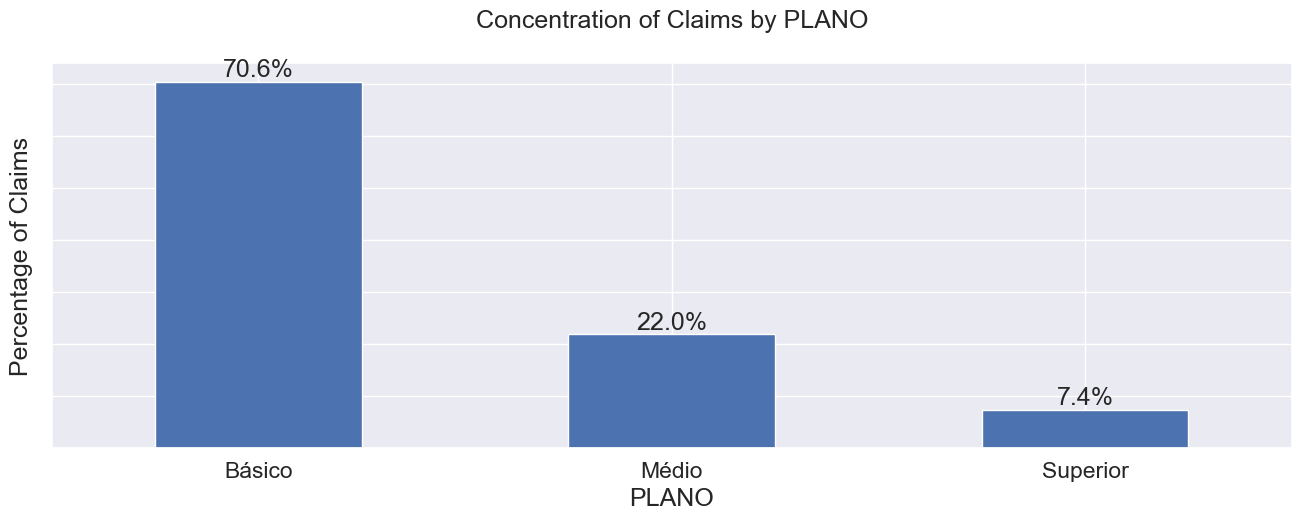

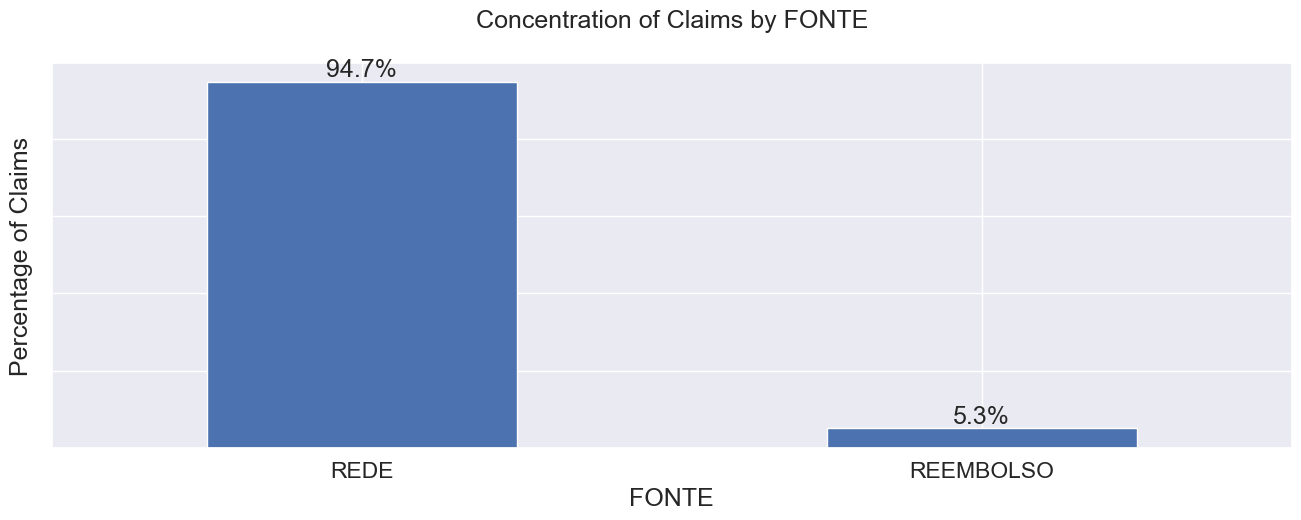

In [91]:
# Visualizing concentration of claims by 'PLANO' type and by 'FONTE'
def plot_concentration(dataframe, column):
    concentration = dataframe[column].value_counts(normalize=True) * 100
    plt.figure(figsize=(16, 5))
    ax = concentration.plot(kind='bar')
    ax.set_ylabel('Percentage of Claims')
    ax.set_title(f'Concentration of Claims by {column}')

    for i in ax.patches:
        ax.annotate(f'{i.get_height():.1f}%', (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')

    ax.yaxis.set_major_formatter(plt.NullFormatter())

    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

    plt.show()

plot_concentration(claims, 'PLANO')
plot_concentration(claims, 'FONTE')

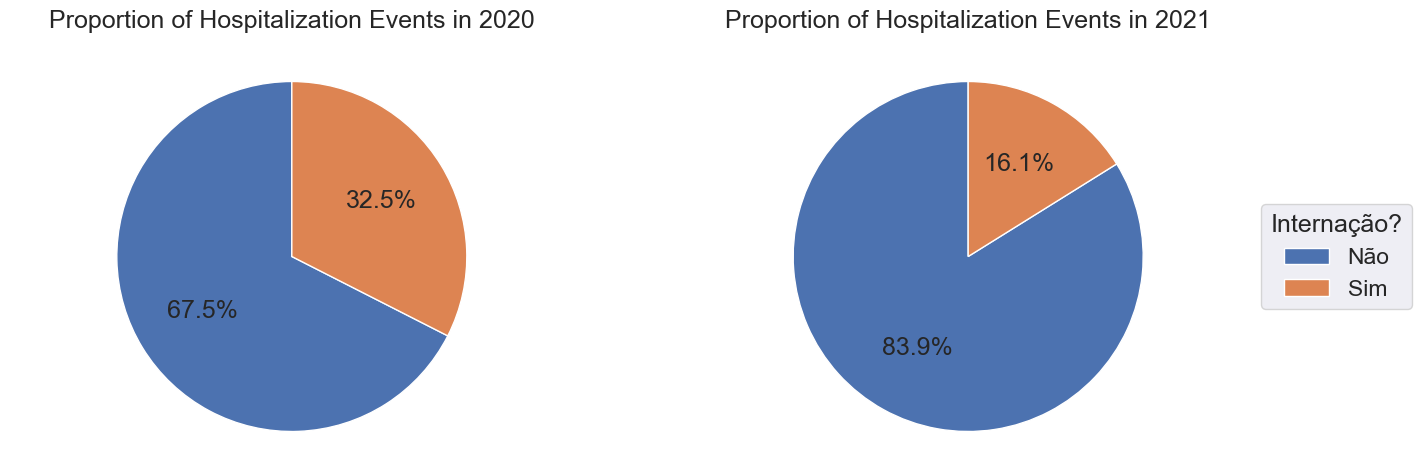

In [85]:
# Visualizing proportion of hospitalization by year
def plot_internacao(dataframe, year, ax, show_legend=False):
    internacao_events = dataframe[dataframe['DATA DO EVENTO'].dt.year == year]['INTERNACAO?'].value_counts()

    wedges, texts, autotexts = ax.pie(internacao_events, labels=None, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Proportion of Hospitalization Events in {year}')
    ax.axis('equal')

    if show_legend:
        ax.legend(wedges, internacao_events.index, title="Internação?", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

plot_internacao(claims, 2020, ax1)
plot_internacao(claims, 2021, ax2, show_legend=True)

plt.show()

## Questions & Answers (Q&A)

### cadastro_base

#### Questions
1. Does the dataframe have any beneficiary with inconsistent registration?
2. Does this dataframe have any beneficiaries with different ``PLANO`` over the reference months? Does the ``TITULARIDADE`` change over the months?
3. Any beneficiary with a different ``DATE DE NASCIMENTO``? More than one date for the same beneficiary.
4. How is the distribution of beneficiaries among ``SEXO``, ``PLANO``, and ``TITULARIDADE``?
5. Can the same beneficiary have more than one ``IDADE`` over time? Due to the base being a monthly record (position date).

#### Answers
1. Yes, 12 beneficiaries have an invalid date of birth, with inconsistent dates. None of them were corrected in subsequent reference months, thus maintaining only the incorrect results.
2. No, all beneficiaries continue with the same plan over the months. The same occurs with the titularity, remaining the same.
3. Yes, the `CODIGO ÚNICO DA PESSOA` = 1388 has two dates of birth: 12/04/1986 until January/2021 and 11/04/1986 from February/2021 onwards.
4. The male gender has the highest number of beneficiaries, as well as the Superior plan in the plan group, while Dependents are the highest number of beneficiaries among the types of titularity.
5. Yes, there are cases where the same beneficiary has 2 or 3 ages, for example.

___________

### sinistros_base

#### Questions
1. Does this dataframe have duplicate event records?
2. What is the trend of events over time? Does the fluctuation mentioned in the challenge proposal really occur? Does the total number of events and the sum of the event values ​​follow the same trend over time?
3. What are the top 5 events in the entire dataset? Is there a variation in this top 5 between 2020 and 2021?
4. Is there any family that stands out in the total number of claims?
5. Is there any beneficiary who stands out? Does he belong to the same family that is at the top?
6. Who are the main ``PRESTADOR``?
7. How is the concentration of claims by ``PLANO`` type? And by ``FONTE``?
8. How do ``INTERNAÇÃO`` events behave in 2020 and 2021?

#### Answers
1. Yes, due to ``DATA DE REFERÊNCIA``, this dataframe also has duplicate records of the same insurance event.
2. The events and their values ​​grew in 2020, the year they peaked. However, in the fourth quarter of this year, there is already a slowdown in this movement, with the year 2021 recording much lower numbers than those registered in the previous year. Thus, there was a great fluctuation over time, so that both the total number of events and the total values ​​of these events followed the same trend over time.
3. Throughout the period, CONSULTA MEDICA EM CONSULTORIO (10101012) stands out as the main reason for claims over time, and also in the individual years of 2020 and 2021. In addition, the other two reasons in the top 3 are the same: ATENDIMENTO EM PRONTO SOCORRO(PCTE COM HM) e HEMOGRAMA COMPLETO-ERITROGRAMA LEUCOGRAMA PLAQUETA. The variation occurs only in one reason from 2020 (CREATININA) to 2021 (SESSAO DE PSICOTERAPIA INDIVIDUAL POR PSICOLOGO), with MATERIAIS closing the podium. Overall, there is no major change in procedures from one year to the next.
4. The main family is 108, with more than 5 thousand records throughout the period. Below it are families 133 and 429, rounding out the top 3.
5. The main beneficiary is 181 and he belongs to the top family, 108.
6. The top 5 providers are 256, 282, 465, 485, and 486. The first one stands out greatly compared to the others, with 9803 records, while the second has 2933, that is, 3 times less than the first place.
7. Claims are concentrated in the BÁSICO ``PLANO``, with 71% of the records over time. In addition, 95% of the events are related to the REDE ``FONTE``, with few records related to REEMBOLSO.
8. The proportion of hospitalization (`INTERNAÇÃO?`) events decreased from 2020 to 2021. In the first year, these represent 33% of the total events, while in 2021 this number is halved, representing 16% of the claims in that year.

## Exporting transformed dataframes

### cadastro_base to beneficiaries

In [44]:
# Converting the 'MÊS DE REFERÊNCIA' and 'ANO DE REFERÊNCIA' columns to date format
cadastro_base['REFERENCE_DATE'] = pd.to_datetime(cadastro_base['ANO DE REFERÊNCIA'].astype(str) + '-' + cadastro_base['MÊS DE REFERÊNCIA'].astype(str), format='%Y-%m')

# Getting the index of the last record for each 'CODIGO ÚNICO DA PESSOA'
last_index = cadastro_base.groupby('CODIGO ÚNICO DA PESSOA')['REFERENCE_DATE'].idxmax()

# Selecting the records corresponding to the indices
beneficiaries = cadastro_base.loc[last_index].reset_index(drop=True)

In [47]:
# Exporting beneficiaries from cadastro_base
beneficiaries.to_excel('beneficiaries.xlsx')

### sinistros_base to claims

In [101]:
# Exporting claims from sinistros_base
claims.to_excel('claims.xlsx', index=False)

## Summary & Conclusion

`cadastro_base`

Based on the EDA conducted, it was noted that some treatments were necessary in the `cadastro_base` dataframe, as it is a base with the position date of the registration updates for each client.

To have unique results for each client (`CODIGO ÚNICO DA PESSOA`), I chose to bring the last record for each client, avoiding problems with duplicate *dates* and *ages*, as was the case before. Additionally, I treated the `DATA DE NASCIMENTO` column to correct the issue found with the 12 invalid records.

As a result, I generated a new treated dataframe named `beneficiaries`, with these unique results coming from `cadastro_base`.

---------------------------------------------------

`sinistros_base`

Based on the EDA, it is noted that the dataset contains duplicate records with different reference dates, similar to the previous dataset.

To address these records and have a single result for each of them, I took the maximum reference date for each claim record, considering all columns that characterize a claim as unique, namely: ``CODIGO DO EVENTO``,``FONTE``,``PLANO``,``TITULARIDADE``,``CODIGO DA FAMILIA``,``CODIGO ÚNICO DA PESSOA``,``DATA DO EVENTO``,``PRESTADOR``,``VALOR DO EVENTO``,``DESCRITOR DO EVENTO``, and ``INTERNACAO?``.

Furthermore, I also performed data preprocessing to ensure that date columns were in valid formats.

In the end, I generated a new dataframe called ``claims``, containing unique records from ``sinistros_base``, to use in my dashboard.